In [1]:
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns

def shorten_tags(tags, max_length=50):
    if len(tags) > max_length:
        return tags[:max_length] + '...'
    return tags

def display_data_as_html(dataframe, title):
    dataframe['tags'] = dataframe['tags'].apply(lambda x: shorten_tags(str(x)))
    html_data = dataframe.to_html()
    html_output = f'''
    <h2>{title}</h2>
    <div style="height: 400px; overflow: auto; border: 1px solid #ccc; padding: 10px;">
        {html_data}
    </div>
    '''
    display(HTML(html_output))

def display_aggregated_data(dataframe, title):
    html_data = dataframe.to_html()
    html_output = f'''
    <h2>{title}</h2>
    <div style="height: 400px; overflow: auto; border: 1px solid #ccc; padding: 10px;">
        {html_data}
    </div>
    '''
    display(HTML(html_output))

def aggregate_crypto_data(dataframe):
    grouped_data = dataframe.groupby('name', sort=False)[[
        'quote.USD.percent_change_1h',
        'quote.USD.percent_change_24h',
        'quote.USD.percent_change_7d',
        'quote.USD.percent_change_30d',
        'quote.USD.percent_change_60d',
        'quote.USD.percent_change_90d'
    ]].mean()
    
    transposed_grouped_data = grouped_data.transpose()
    transposed_grouped_data.reset_index(inplace=True)
    transposed_grouped_data.columns.name = None
    transposed_grouped_data.rename(columns={'index': 'Metric'}, inplace=True)

    metric_rename = {
        'quote.USD.percent_change_1h': '1h',
        'quote.USD.percent_change_24h': '24h',
        'quote.USD.percent_change_7d': '7d',
        'quote.USD.percent_change_30d': '30d',
        'quote.USD.percent_change_60d': '60d',
        'quote.USD.percent_change_90d': '90d'
    }
    transposed_grouped_data['Metric'] = transposed_grouped_data['Metric'].replace(metric_rename)
    
    return transposed_grouped_data

def plot_crypto_data(transposed_grouped_data):
    reshaped_data = transposed_grouped_data.melt(id_vars=["Metric"], var_name="Cryptocurrency", value_name="Percentage Change")
    
    plt.figure(figsize=(14, 8))
    cat_plot = sns.catplot(
        data=reshaped_data, 
        x="Metric", 
        y="Percentage Change", 
        hue="Cryptocurrency", 
        kind="point", 
        height=6, 
        aspect=2
    )
    cat_plot.set_xticklabels(rotation=45)
    plt.title('Percentage Change for Cryptocurrencies across Different Metrics')
    plt.show()

def plot_price_over_time(dataframe, crypto_name):
    crypto_df = dataframe[dataframe['name'] == crypto_name].copy()
    crypto_df.loc[:, 'timestamp'] = pd.to_datetime(crypto_df['timestamp'])  # Ensures timestamp is in datetime format
    crypto_df = crypto_df.sort_values(by='timestamp')  # Sorts by timestamp
    
    plt.figure(figsize=(14, 8))
    plt.plot(crypto_df['timestamp'], crypto_df['quote.USD.price'], label=crypto_name)
    plt.xlabel('Timestamp')
    plt.ylabel('USD Price')
    plt.title(f'USD Price of {crypto_name} Over Time')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11043,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value', '...",2.100000e+07,1.969815e+07,1.969815e+07,False,NaN,1,NaN,NaN,NaN,2024-05-14T10:57:00.000Z,61681.125791,2.552527e+10,13.2585,-0.130311,-1.622307,-3.805652,-4.371444,-8.428476,20.246088,1.215004e+12,53.7511,1.295304e+12,NaN,2024-05-14T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-14 19:59:29.040016
1,1027,Ethereum,ETH,ethereum,8922,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem', '...",NaN,1.201150e+08,1.201150e+08,True,NaN,2,NaN,NaN,NaN,2024-05-14T10:57:00.000Z,2903.393908,1.146525e+10,10.9468,-0.210589,-2.043760,-6.422011,-5.083554,-20.740686,5.374320,3.487411e+11,15.4311,3.487411e+11,NaN,2024-05-14T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-14 19:59:29.040016
2,825,Tether USDt,USDT,tether,85298,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'avalanc...",NaN,1.108469e+11,1.130866e+11,True,NaN,3,NaN,NaN,NaN,2024-05-14T10:57:00.000Z,0.999387,4.916092e+10,19.4388,-0.066116,-0.029908,-0.073367,-0.105119,-0.010842,-0.107440,1.107790e+11,4.9017,1.130172e+11,NaN,2024-05-14T10:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-14 19:59:29.040016
3,1839,BNB,BNB,bnb,2156,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payments'...",NaN,1.475867e+08,1.475867e+08,False,NaN,4,NaN,NaN,NaN,2024-05-14T10:57:00.000Z,585.911592,1.412842e+09,-11.5421,-0.090011,-1.614452,-1.228541,4.753472,1.317501,77.002364,8.647277e+10,3.8258,8.647277e+10,NaN,2024-05-14T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-14 19:59:29.040016
4,5426,Solana,SOL,solana,658,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-holdi...",NaN,4.486539e+08,5.760177e+08,True,NaN,5,NaN,NaN,NaN,2024-05-14T10:57:00.000Z,146.036251,2.080940e+09,12.2363,-0.134259,0.473727,-6.957812,1.871375,-14.324455,26.422597,6.551973e+10,2.8977,8.411946e+10,NaN,2024-05-14T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-14 19:59:29.040016
5,3408,USDC,USDC,usd-coin,19078,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-backed...",NaN,3.311350e+10,3.311350e+10,False,NaN,6,NaN,NaN,NaN,2024-05-14T10:57:00.000Z,0.999882,4.965379e+09,18.9700,-0.061213,-0.016702,-0.029759,-0.003494,-0.010712,-0.026433,3.310960e+10,1.4643,3.310960e+10,NaN,2024-05-14T10:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-14 19:59:29.040016
6,52,XRP,XRP,xrp,1314,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions', 'ar...",1.000000e+11,5.535918e+10,9.998763e+10,False,NaN,7,NaN,NaN,NaN,2024-05-14T10:58:00.000Z,0.508090,8.253871e+08,-0.9602,0.731334,0.787634,-5.826875,3.114651,-18.032620,-4.512957,2.812742e+10,1.2440,5.080895e+10,NaN,2024-05-14T10:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-14 19:59:29.040016
7,11419,Toncoin,TON,toncoin,318,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'dwf-l...",NaN,3.474053e+09,5.106580e+09,True,NaN,8,3.414167e+09,2.353561e+10,NaN,2024-05-14T10:57:00.000Z,6.893514,5.367527e+08,-24.4592,-0.946597,-6.221930,16.322755,6.523370,86.356873,212.725236,2.394844e+10,1.0595,3.520228e+10,NaN,2024-05-14T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-14 19:59:29.040016
8,74,Dogecoin,DOGE,dogecoin,964,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'sc

,Metric,Bitcoin,Ethereum,Tether USDt,BNB,Solana,USDC,XRP,Toncoin,Dogecoin,Cardano,Shiba Inu,Avalanche,TRON,Polkadot,Bitcoin Cash
0,1h,-0.120404,-0.254443,-0.018702,-0.064759,-0.083424,-0.016798,0.704878,-0.877389,-0.793412,0.018596,-0.408021,0.340027,0.060889,0.299165,-0.252630
1,24h,-1.573343,-2.006443,-0.019621,-1.611129,0.550356,-0.007428,0.618444,-6.123723,3.584450,-3.029258,0.798022,-1.829108,-0.870888,-2.023248,-1.501803
2,7d,-3.773847,-6.395611,-0.059127,-1.234694,-6.949747,-0.006960,-5.897502,16.463279,-6.251044,-3.727716,-1.699215,-11.311760,4.057034,-8.354677,-9.590333
3,30d,-4.364259,-5.056056,-0.107455,4.725677,1.925776,-0.004297,3.114911,6.656521,-4.922590,-7.324868,5.444995,-10.944521,11.806850,-2.565868,-12.466690
4,60d,-8.375559,-20.730132,-0.005011,1.368374,-14.132358,-0.011014,-18.040767,86.710554,-7.099952,-37.708868,-17.947496,-35.603779,-0.761006,-36.201408,7.851028
5,90d,20.270757,5.454322,-0.097670,76.741490,26.567759,-0.012439,-4.572553,213.230541,78.760402,-24.298635,143.991127,-20.880641,-3.474911,-13.742833,55.047831


<Figure size 1400x800 with 0 Axes>

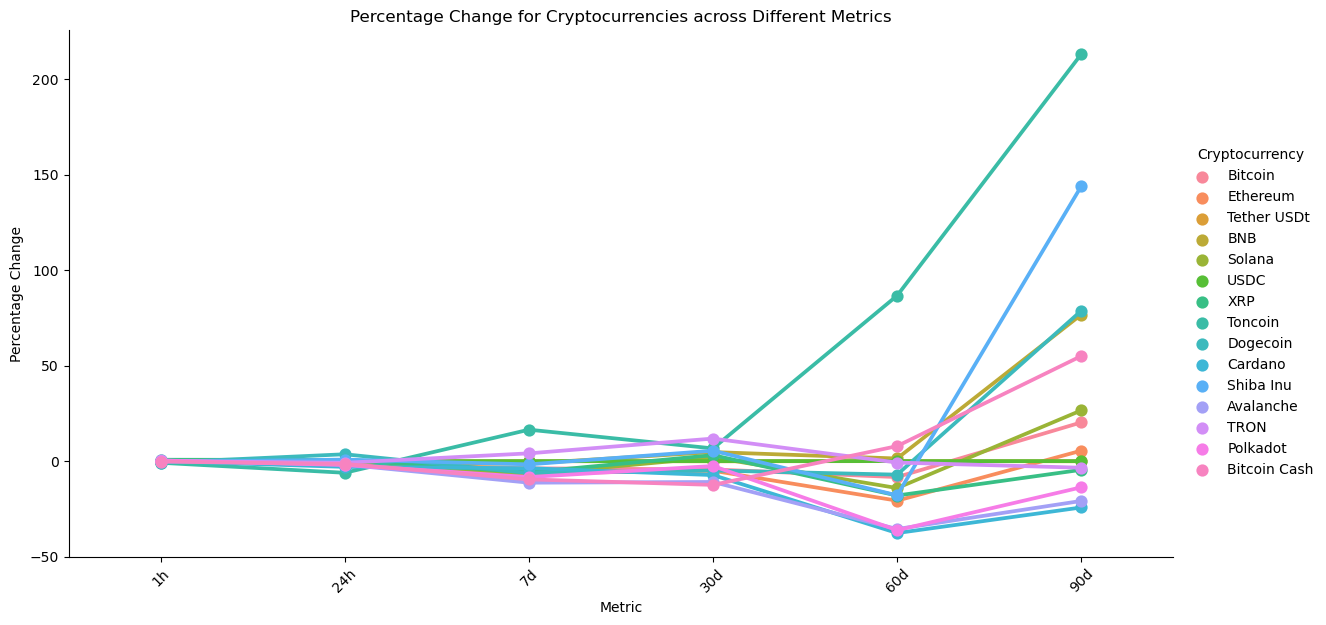

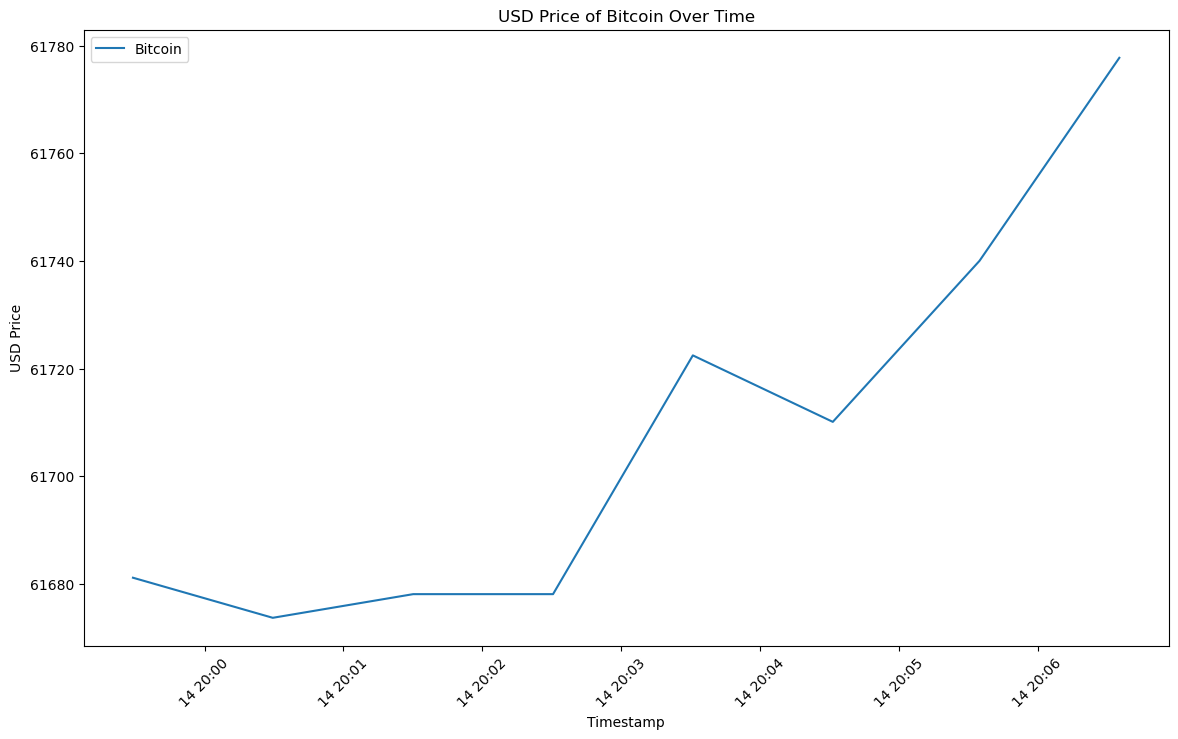

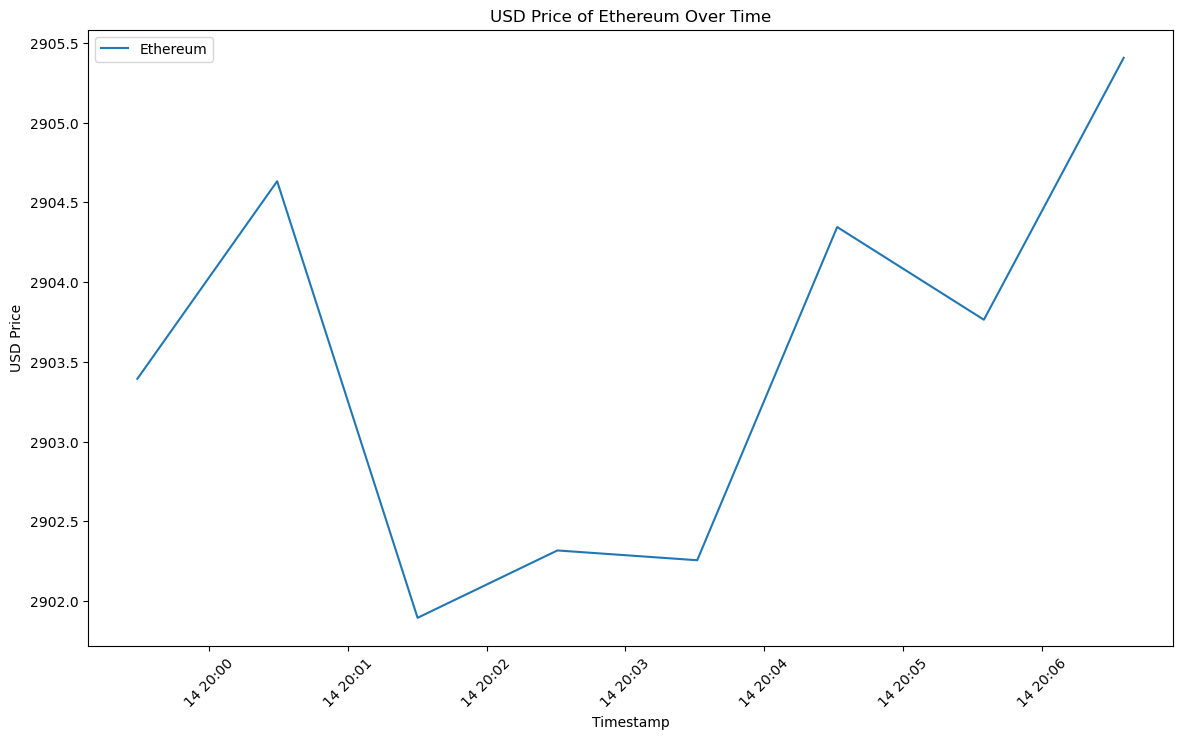

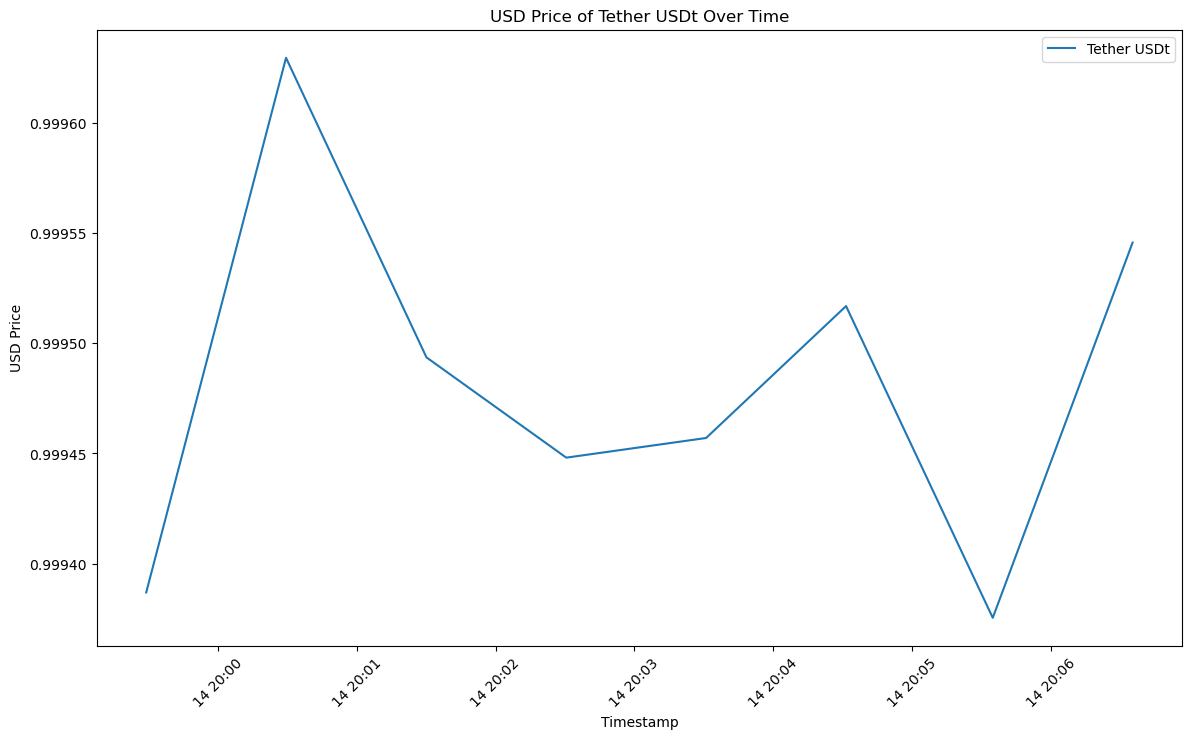

In [2]:
if __name__ == "__main__":
    # Loading the latest collected data
    collected_crypto_data = pd.read_csv('/home/rafael/Documents/Python/CryptoAPI/crypto_data.csv')

    # Displaying the collected data as HTML with a title
    display_data_as_html(collected_crypto_data, "Collected Cryptocurrency Data")

    # Aggregating and display the data with a title
    aggregated_data = aggregate_crypto_data(collected_crypto_data)
    display_aggregated_data(aggregated_data, "Aggregated Cryptocurrency Performance Data")
    
    # Plotting the aggregated data
    plot_crypto_data(aggregated_data)

    # Plotting price over time for Bitcoin, Ethereum, and Tether USDt
    plot_price_over_time(collected_crypto_data, 'Bitcoin')
    plot_price_over_time(collected_crypto_data, 'Ethereum')
    plot_price_over_time(collected_crypto_data, 'Tether USDt')